# Train a Sentiment Analysis Classifier
the code below builds a simple classifier that uses tf-idf to vectorize text and a logistic regression model to make predictions.

# New Section

In [1]:
# load data and take a quick look

# from google.colab import drive
# drive.mount('/content/drive') path /content/drive/MyDrive/Royal Holloway AI/NLP/

import pandas as pd
filepath='data.csv'
raw_data = pd.read_csv(filepath)

raw_data.head()

,Unnamed: 0,text,sentiment
0,0,Enjoy the opening credits. They're the best th...,neg
1,1,"Well, the Sci-Fi channel keeps churning these ...",neg
2,2,It takes guts to make a movie on Gandhi in Ind...,pos
3,3,The Nest is really just another 'nature run am...,neg
4,4,Waco: Rules of Engagement does a very good job...,pos


In [2]:
# check the size of the data and its class distribution
all_text = raw_data['text'].tolist()
all_lables = raw_data['sentiment'].tolist()

print('entry num', len(all_text))
print('num of pos entries', len([l for l in all_lables if l=='pos']))
print('num of neg entries', len([l for l in all_lables if l=='neg']))



entry num 40000
num of pos entries 20000
num of neg entries 20000


In [3]:
# text cleaning and preprocessing:

# Lower case all the text to avoid mismatch
all_text = [words.lower() for words in all_text]

#tokenizing the sentences into words using nltk word tokenizer 
import nltk
#check if required resource is available or not and if not then install it.
try:
  nltk.data.find('tokenizers/punkt')
except LookupError:
  nltk.download('punkt')
from nltk.tokenize import word_tokenize

#list of tokenized words from the entire text list
tokenized_sents = [word_tokenize(i) for i in all_text]


In [4]:
#lets see what we got
tokenized_sents[0][:10]

['enjoy',
 'the',
 'opening',
 'credits',
 '.',
 'they',
 "'re",
 'the',
 'best',
 'thing']

Now that we have tokenized the words, we can remove the stopwords and punctuation mark from them as they are not useful for computers/classifer

In [5]:
from nltk.corpus import stopwords
import string
nltk.download('stopwords')
en_stopwords = stopwords.words('english')
#adding some additional stopwords that we observed in text to list of stopwords 
new_stopwords = ['--','`',"'",'``', "''","'s",'br','...',"'re"]
en_stopwords.extend(new_stopwords)

#clean text is a nested list of clean reviews 
clean_text = []

for review in tokenized_sents:
  tokenized_sents_wo_sw = [word for word in review if word not in en_stopwords and word not in string.punctuation]
  clean_text.append(tokenized_sents_wo_sw)



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rohankilledar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
clean_text[0][:10]

['enjoy',
 'opening',
 'credits',
 'best',
 'thing',
 'second-rate',
 'inoffensive',
 'time-killer',
 'features',
 'passable']

we can also lemmatize the words to find the basic form of word that means the same thing 

In [7]:
from nltk.stem import WordNetLemmatizer
#check if required resource is available or not and if not then install it.
try:
  nltk.data.find('corpora/wordnet')
except LookupError:
  nltk.download('wordnet')  
lemmatizer = WordNetLemmatizer()

lemmatized_clean_text=[] 
#all clean text is a list of all the words from all the reviews
all_clean_text = []

for review in clean_text:
  lemm = [lemmatizer.lemmatize(word) for word in review]
  lemmatized_clean_text.append(lemm)
  all_clean_text.extend(lemm)

In [8]:
lemmatized_clean_text[0][:10]

['enjoy',
 'opening',
 'credit',
 'best',
 'thing',
 'second-rate',
 'inoffensive',
 'time-killer',
 'feature',
 'passable']

we can see it found the lemma of credits -> credit and features to feature, so its working fine!

Let's make a function of this preprocessing of data for easier use later.

In [9]:
def preprocessing(sentence, stopwords_list = en_stopwords, lemma = lemmatizer):
  clean_word = []
  for word in sentence:
    word = word.lower()
    if word not in stopwords_list and word not in string.punctuation:
      clean_word.append(lemma.lemmatize(word))
  return clean_word

In [10]:
cw=preprocessing(tokenized_sents[0])
cw[:10]

['enjoy',
 'opening',
 'credit',
 'best',
 'thing',
 'second-rate',
 'inoffensive',
 'time-killer',
 'feature',
 'passable']

So our function works as expected and provides the same output

Lets have a visual look at how our list of words look using wordcloud

In [11]:
!pip install wordcloud

     |████████████████████████████████| 220 kB 1.7 MB/s 
  Created wheel for wordcloud: filename=wordcloud-1.8.1-cp38-cp38-macosx_10_9_x86_64.whl size=158420 sha256=d9285874f12b4d710e9327d80090bf406d1285aeb34571c9c26648430ffabaf3
  Stored in directory: /Users/rohankilledar/Library/Caches/pip/wheels/4d/3f/0d/a2ba9b7895c9f1be89018b3141c3df3d4f9c786c882ccfbc3b
Successfully built wordcloud


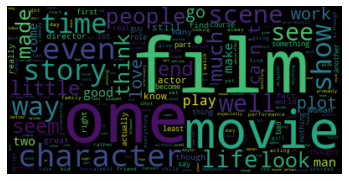

In [12]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt
# Create and generate a word cloud image:
wordcloud = WordCloud().generate((" ").join(all_clean_text))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

now that we have the clean data, we can do some analysis of the data.

In [13]:
from nltk import FreqDist
# i figured some stopwords using this and removed them in the previous step, I think We can use this before removing stopwords to find more stopwords
all_words_frequency = FreqDist(all_clean_text)
all_words_frequency.most_common(15)


[('movie', 79890),
 ('film', 72054),
 ("n't", 52856),
 ('one', 42797),
 ('like', 32008),
 ('time', 23588),
 ('good', 23165),
 ('character', 22278),
 ('would', 21196),
 ('even', 19801),
 ('story', 19455),
 ('get', 19439),
 ('see', 18862),
 ('make', 18753),
 ('really', 18373)]

In [14]:
print("Total number of unique words: "+ str(len(all_words_frequency)))
# get 2000 frequently occuring words
most_common_words = all_words_frequency.most_common(2000)
word_features = [item[0] for item in most_common_words]
print (word_features[:10])

Total number of unique words: 136251
['movie', 'film', "n't", 'one', 'like', 'time', 'good', 'character', 'would', 'even']


lets use bag of words to create feature set for our Naive Bayese classifier

In [16]:
from nltk import ngrams

# feature extractor function for unigram
def bag_of_words(words):	
	words_dictionary = dict([word, True] for word in words)	
	return words_dictionary


#when using bi-grams, there are some stopwords that makes sense in a sentence in context to other words like "It was a very good movie"
#stopword 'very' is important for bigram so lets use a different set of stopwords for bigram

en_stopwords_for_bigram = set(en_stopwords) - {'very','over','under','above','below','more','less','no','nor','not','never','only'}

# feature extractor function for ngrams (unigram)
def bag_of_ngrams(words, n=2):
	words_ng = []
	for item in iter(ngrams(words, n)):
		words_ng.append(item)
	words_dictionary = dict([word, True] for word in words_ng)	
	return words_dictionary

 #  let's define a new function that extracts all features
# i.e. that extracts both unigram and bigrams features
def bag_of_all_words(words, n=2):
	words_clean = preprocessing(words, en_stopwords)
	words_clean_for_bigrams = preprocessing(words, en_stopwords_for_bigram)

	unigram_features = bag_of_words(words_clean)
	bigram_features = bag_of_ngrams(words_clean_for_bigrams)

	all_features = unigram_features.copy()
	all_features.update(bigram_features)

	return all_features

In [ ]:
# bag_of_words(preprocessing(tokenized_sents[0]))
# bag_of_ngrams(preprocessing(tokenized_sents[0]))
# bag_of_all_words(preprocessing(tokenized_sents[0]))

The following train test split tries to keep the positive and negative reviews in same proportion to avoid class imbalance


In [17]:
pos_r = raw_data.loc[raw_data['sentiment'] == 'pos']
pos_review=pos_r['text'].tolist()

neg_r = raw_data.loc[raw_data['sentiment'] == 'neg']
neg_review=neg_r['text'].tolist()

train_text = pos_review[:15000]+neg_review[:15000]
train_label = ['pos' for n in range(len(pos_review[:15000]))] + ['neg' for n in range(len(neg_review[:15000]))]
test_text = pos_review[15000:]+neg_review[15000:]
test_label = ['pos' for n in range(len(pos_review[15000:]))] + ['neg' for n in range(len(neg_review[15000:]))]


In [18]:
# positive reviews feature set
pos_review_set = []
for words in pos_review:
	pos_review_set.append((bag_of_all_words(word_tokenize(words.replace(".", " "))), 'pos'))
 
 #after tokenizing and preprocessing data, I figured the .(dot) is not getting tokenized 
 #and joining few words like watch.brilliant and wrong.this

# # negative reviews feature set
neg_review_set = []
for words in neg_review:
	neg_review_set.append((bag_of_all_words(word_tokenize(words.replace("."," "))), 'neg'))

We have 20000 positive and 20000 negative review each. We can divide them in the ratio of 70:30 for training and testing dataset.

In [19]:
train_set = pos_review_set[:14000] + neg_review_set[:14000]
test_set = pos_review_set[14000:] + neg_review_set[14000:]

Now that we have our training and test set of all positive and negative feature set, we can apply classifier to it

In [21]:
from nltk import classify
from nltk import NaiveBayesClassifier
import nltk.metrics as met

#initializing the classifier object
NBclassifier = NaiveBayesClassifier.train(train_set)

accuracy = classify.accuracy(NBclassifier,test_set)
print("acc "+ str(accuracy))

#we can check the most informative features that the classifier determined to label the test set
#print(NBclassifier.show_most_informative_features(10))


acc 0.8860833333333333


Let's test our classifier using some custom reviews

In [22]:
#test_review = word_tokenize(neg_review[5].replace("."," "))
custom_review1 = "Captain America getting Thor's hammer was the highlight of the movie and it was shocking and surprising"
test_review1 = word_tokenize(custom_review1)
test_review_set1 = bag_of_all_words(test_review1)
print("Custom Review1: "+custom_review1)
print(NBclassifier.classify(test_review_set1))

#custom_review2 = " the movie was a bit off and too obvious"
#custom_review2= test_text[7]
custom_review2="I was not able to take off my eyes all the time. It kept me hooked for a long time. I was also googling things about it after it was over"
test_review2 = word_tokenize(custom_review2)
test_review_set2 = bag_of_all_words(test_review2)
print("Custom Review2: "+custom_review2)
print(NBclassifier.classify(test_review_set2))

custom_review3="This was not a good movie at all. It was long and very dull."
test_review3 = word_tokenize(custom_review3)
test_review_set3 = bag_of_all_words(test_review3)
print("Custom Review2: "+custom_review3)
print(NBclassifier.classify(test_review_set3))



Custom Review1: Captain America getting Thor's hammer was the highlight of the movie and it was shocking and surprising
pos
Custom Review2: I was not able to take off my eyes all the time. It kept me hooked for a long time. I was also googling things about it after it was over
pos
Custom Review2: This was not a good movie at all. It was long and very dull.
neg


using the above code, Lets make a function that gives the predicted values, in our case sentiments using our classifier

In [23]:
def predict(test_text):
  test_pred = []
  for review in test_text:
    test_review_token = word_tokenize(review.replace("."," "))
    test_review_set = bag_of_all_words(test_review_token)
    test_pred.append(NBclassifier.classify(test_review_set))
  return test_pred


now we can use all of the functions we made to get the test accuracy for the test_set we created without the labels with 75:25 split of train:test 

In [24]:
test_pred=predict(test_text)

from sklearn.metrics import precision_recall_fscore_support,accuracy_score
acc= accuracy_score(test_pred,test_label)
pre,rec,f1,_ = precision_recall_fscore_support(test_label,test_pred,average='macro')
print("acc ", acc)
print("precision ",pre)
print("rec ", rec)
print("f1  ",f1)

acc  0.887
precision  0.8870356692072741
rec  0.887
f1   0.8869973964200134


To use these functions we need to create a class as we would use pickle to store the object of that class

In [25]:
class cw1:
    from nltk.corpus import stopwords
    import string
    from nltk.stem import WordNetLemmatizer
    from nltk.tokenize import word_tokenize
    lemmatizer =WordNetLemmatizer()
    en_stopwords = stopwords.words('english')
  
    def preprocessing(self,sentence, stopwords_list = en_stopwords, lemma = lemmatizer):
        clean_word = []
        for word in sentence:
            word = word.lower()
            if word not in stopwords_list and word not in string.punctuation:
                clean_word.append(lemma.lemmatize(word))
        return clean_word
    
    from nltk import ngrams

# feature extractor function for unigram
    def bag_of_words(self,words):	
        words_dictionary = dict([word, True] for word in words)	
        return words_dictionary


#when using bi-grams, there are some stopwords that makes sense in a sentence in context to other words like "It was a very good movie"
#stopword 'very' is important for bigram so lets use a different set of stopwords for bigram

    en_stopwords_for_bigram = set(en_stopwords) - {'very','over','under','above','below','more','less','no','nor','not','never','only'}

# feature extractor function for ngrams (unigram)
    def bag_of_ngrams(self,words, n=2):
        words_ng = []
        for item in iter(ngrams(words, n)):
            words_ng.append(item)
        words_dictionary = dict([word, True] for word in words_ng)	
        return words_dictionary

 #  let's define a new function that extracts all features
# i.e. that extracts both unigram and bigrams features
    def bag_of_all_words(self,words, n=2):
        words_clean = preprocessing(words, en_stopwords)
        words_clean_for_bigrams = preprocessing(words, en_stopwords_for_bigram)

        unigram_features = bag_of_words(words_clean)
        bigram_features = bag_of_ngrams(words_clean_for_bigrams)

        all_features = unigram_features.copy()
        all_features.update(bigram_features)

        return all_features

    def predict(self,test_text,classifier = NBclassifier):
        test_pred = []
        for review in test_text:
            test_review_token = word_tokenize(review.replace("."," "))
            test_review_set = bag_of_all_words(test_review_token)
            test_pred.append(classifier.classify(test_review_set))
        return test_pred

cw1object = cw1()
cw1object.predict(test_text[0:10])

['pos', 'neg', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos']

When the classifier was trained using unigram features the accuracy was less compared to the combined feature set.


Another way to do this was using TF-IDF and logistic method :


In [26]:
# data split. 
# Feel free to use differnt ratios or strategies to split the data.
train_text = all_text[:35000]
train_labels = all_lables[:35000]
test_text = all_text[35000:]
test_labels = all_lables[35000:]

In [27]:
# training: tf-idf + logistic regression
# you should explore different representations and algorithms.
from sklearn.feature_extraction.text import TfidfVectorizer
max_feature_num = 1000
train_vectorizer = TfidfVectorizer(max_features=max_feature_num)
train_vecs = train_vectorizer.fit_transform(train_text)
test_vecs = TfidfVectorizer(max_features=max_feature_num,vocabulary=train_vectorizer.vocabulary_).fit_transform(test_text)

# train model
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(train_vecs, train_labels)

# test model
test_pred = clf.predict(test_vecs)
from sklearn.metrics import precision_recall_fscore_support,accuracy_score
acc = accuracy_score(test_labels, test_pred)
pre, rec, f1, _ = precision_recall_fscore_support(test_labels, test_pred, average='macro')
print('acc', acc)
print('precision', pre)
print('rec', rec)
print('f1', f1)

acc 0.8616
precision 0.8616043455692743
rec 0.8615913854621674
f1 0.8615956596398864
